In [1]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import svm
import math
from nltk.collocations import *
from nltk import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
df_set = pd.read_csv('../data/train_set.tsv', sep='\t')

df_test = pd.read_csv('../data/test_set.tsv', sep='\t')



In [3]:
df_set

,Id,Title,Content,Category
0,1043,Saudi ministry to employ women,Women will be employed in Saudi Arabia's forei...,business
1,1388,Venezuela identifies 'idle' farms,Venezuelan authorities have identified more th...,business
2,1138,Winter freeze keeps oil above $50,Oil prices carried on rising on Wednesday afte...,business
3,1004,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...,business
4,1017,Parmalat boasts doubled profits,"Parmalat, the Italian food group at the centre...",business
...,...,...,...,...
1775,5161,When technology gets personal,"In 2020, whipping out your mobile phone to mak...",tech
1776,5259,Apple sues 'Tiger' file sharers,Apple has taken more legal action to stop onli...,tech
1777,5066,Kenyan school turns to handhelds,At the Mbita Point primary school in western K...,tech
1778,5321,Consumer concern over RFID tags,Consumers are very concerned about the use of ...,tech


# Wordclouds

In [ ]:
cat_df = df_set.groupby('Category')['Content'].apply(lambda x: ''.join(x))


In [ ]:
text = cat_df['business']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['entertainment']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['politics']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['sport']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['tech']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Classification

### Tokenization of all articles' content, to use in classification methods

#### *Bag of Words*

In [12]:
tokens = df_set.Content.values
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words= STOPWORDS)
X = vectorizer.fit_transform(tokens)
vectorizer.get_feature_names()
X = X.toarray()

#### TF_IDF

In [13]:
vectorizer2 = TfidfVectorizer(ngram_range=(1,1), stop_words= STOPWORDS)
Z = vectorizer2.fit_transform(tokens)
Z = Z.toarray()

In [16]:
categories = df_set.Category.values


## Classification Method: Support Vector Machine

#### Using Bag of Words

In [34]:
clf_bow = svm.SVC(probability=True)
clf_bow.fit(X, y = categories)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

#### Using TF_IDF

In [17]:
# parameters = {'kernel':('linear', 'rbf'), 'C':[1.0], 'gamma':'auto'}
clf = svm.SVC(probability=True)
gs_clf = GridSearchCV(estimator=clf,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

clf.fit(Z, y = categories)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### *Cross Validation*

In [14]:
test_tokens = df_test.Content.values
X_test = vectorizer.transform(test_tokens)
X_test = X_test.toarray()

In [15]:
test_tokens = df_test.Content.values
Ζ_test = vectorizer2.transform(test_tokens)
Ζ_test = Ζ_test.toarray()

In [35]:
score = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
# sc = make_scorer(sklearn.metrics.accuracy_score)
results = cross_validate(clf_bow, X_test, df_test.Category.values, cv = 10, n_jobs=4, scoring=score)
results

{'fit_time': array([57.85653067, 57.33205438, 57.33679891, 58.34764528, 59.13403511,
        59.39841819, 59.12477565, 60.26183438, 48.05807424, 48.20466352]),
 'score_time': array([0.95790863, 0.94159842, 0.92634249, 0.96418166, 0.81628156,
        0.82686114, 0.84315395, 0.73545694, 0.62873626, 0.60907531]),
 'test_precision_macro': array([0.88030303, 0.91396104, 0.88880231, 0.89111111, 0.87777778,
        0.85396825, 0.89920635, 0.87863248, 0.97777778, 0.89090909]),
 'test_recall_macro': array([0.86380231, 0.8734127 , 0.88277778, 0.865     , 0.835     ,
        0.81363636, 0.88277778, 0.845     , 0.975     , 0.855     ]),
 'test_f1_macro': array([0.86966288, 0.88314286, 0.88341737, 0.86226721, 0.83305873,
        0.82240896, 0.88808081, 0.84306921, 0.97490196, 0.85032581]),
 'test_accuracy': array([0.86666667, 0.88888889, 0.88888889, 0.86666667, 0.84444444,
        0.82222222, 0.88888889, 0.84090909, 0.97727273, 0.86363636])}

In [18]:
score = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
# sc = make_scorer(sklearn.metrics.accuracy_score)
results = cross_validate(clf, Ζ_test, df_test.Category.values, cv = 10, n_jobs=4, scoring=score)
results


{'fit_time': array([71.62636065, 72.09793305, 73.00983524, 71.96801519, 73.76527929,
        72.9734292 , 72.93963838, 74.58348322, 62.56164241, 62.29069734]),
 'score_time': array([0.97085714, 1.03709912, 1.0420332 , 1.05721211, 1.29719067,
        1.2648294 , 1.09507394, 0.95675206, 0.91786146, 0.93134117]),
 'test_precision_macro': array([0.93162393, 0.91333333, 0.96666667, 0.96666667, 0.98181818,
        0.96666667, 0.96666667, 0.98181818, 0.92348485, 0.94141414]),
 'test_recall_macro': array([0.90602453, 0.84484127, 0.95277778, 0.95277778, 0.975     ,
        0.95      , 0.95      , 0.975     , 0.9       , 0.925     ]),
 'test_f1_macro': array([0.9157265 , 0.85817016, 0.95672014, 0.95672014, 0.97714286,
        0.95324675, 0.95324675, 0.97714286, 0.90538961, 0.92303383]),
 'test_accuracy': array([0.91111111, 0.86666667, 0.95555556, 0.95555556, 0.97777778,
        0.95555556, 0.95555556, 0.97727273, 0.90909091, 0.93181818])}

## Classification Method: Random Forests

#### Using Bag of Words

In [20]:
forest = RandomForestClassifier(n_jobs=4)
# forest.fit(X, y = categories)

#### Using TF-IDF

In [24]:
forest_tf_idf = RandomForestClassifier(max_depth=5,n_jobs=4)
forest_tf_idf.fit(Z, y = categories)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

### *Cross Validation*

In [26]:
test_tokens = df_test.Content.values
X_test = vectorizer.transform(test_tokens)
X_test = X_test.toarray()


In [27]:
test_tokens = df_test.Content.values
Z_test = vectorizer2.transform(test_tokens)
Z_test = Z_test.toarray()

In [21]:
score = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
# sc = make_scorer(sklearn.metrics.accuracy_score)
results = cross_validate(forest, X_test, df_test.Category.values, cv = 10, n_jobs=4, scoring=score)
results




{'fit_time': array([0.76874542, 0.77185965, 0.77693415, 0.7697618 , 0.76199985,
        0.76977491, 0.76595211, 0.87421203, 0.50973654, 0.50177765]),
 'score_time': array([0.10551882, 0.10484195, 0.11248994, 0.11124492, 0.11527491,
        0.11641765, 0.11255932, 0.11481953, 0.10805106, 0.10876107]),
 'test_precision_macro': array([0.925     , 0.87166667, 0.94166667, 0.92444444, 0.898557  ,
        0.91098901, 0.90952381, 0.92626263, 0.92051282, 0.85649351]),
 'test_recall_macro': array([0.83214286, 0.79984127, 0.92777778, 0.905     , 0.855     ,
        0.85      , 0.85277778, 0.9       , 0.875     , 0.805     ]),
 'test_f1_macro': array([0.82940171, 0.81445613, 0.93172014, 0.90389963, 0.85566387,
        0.86185444, 0.86199487, 0.893863  , 0.88291071, 0.79718615]),
 'test_accuracy': array([0.86666667, 0.82222222, 0.93333333, 0.91111111, 0.86666667,
        0.86666667, 0.86666667, 0.90909091, 0.88636364, 0.81818182])}

In [25]:
score = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
# sc = make_scorer(sklearn.metrics.accuracy_score)
results = cross_validate(forest_tf_idf, Z_test, df_test.Category.values, cv = 10, n_jobs=4, scoring=score)
results

{'fit_time': array([0.76649117, 0.76521158, 0.76374388, 0.75808191, 0.74985552,
        0.75311613, 0.78188038, 0.78177857, 0.51494145, 0.51162457]),
 'score_time': array([0.10778999, 0.10733008, 0.10810876, 0.10615134, 0.11103702,
        0.11116195, 0.11237359, 0.11146307, 0.11289263, 0.11265659]),
 'test_precision_macro': array([0.90952381, 0.92848485, 0.902331  , 0.94848485, 0.95104895,
        0.95      , 0.92467532, 0.94848485, 0.89194139, 0.89551282]),
 'test_recall_macro': array([0.84253247, 0.86706349, 0.87777778, 0.925     , 0.925     ,
        0.925     , 0.87777778, 0.925     , 0.85      , 0.85      ]),
 'test_f1_macro': array([0.84724638, 0.88006347, 0.88214834, 0.92614053, 0.93190476,
        0.92696868, 0.88823529, 0.92614053, 0.85624405, 0.83982213]),
 'test_accuracy': array([0.86666667, 0.88888889, 0.88888889, 0.93333333, 0.93333333,
        0.93333333, 0.88888889, 0.93181818, 0.86363636, 0.86363636])}

In [28]:
train_categories = df_set.Category.values
test_categories = df_test.Category.values

In [33]:
labels = ['business','politics', 'entertainment', 'sport', 'tech']
y_train = label_binarize(train_categories, classes = labels)
y_test = label_binarize(test_categories, classes = labels)
y_test

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [30]:
classifier = OneVsRestClassifier(forest)

In [32]:
cross_validate(classifier, X_test, y_test, cv = 10, n_jobs=4, scoring='roc_auc')


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [22]:
y_score = classifier.fit(X, train_categories).predict_proba(X_test) 

In [23]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

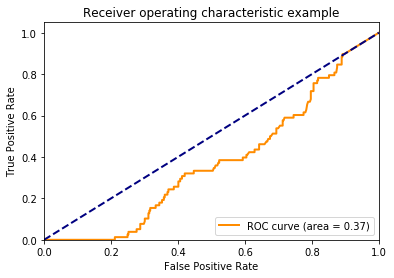

In [24]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()